In [132]:
# Imports
import numpy as np
import networkx as nx
import numpy.random as rnd
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [133]:
# Read CVS files
PATH1_MAT = genfromtxt('./q3dm1-path1.csv', delimiter=',')
PATH2_MAT = genfromtxt('./q3dm1-path2.csv', delimiter=',')

## SOM

In [134]:
def initRingSOM(matX, k):
    """
        Initialize SOM topology as grid.
        
        Input:
            matX: matrix of points
            k   : number of neurons
    """
    # Create graph
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    
    # Get shape of the matrix
    m, n = matX.shape
    
    # Sample k points from our
    # input matrix as our neurons
    smpl = rnd.choice(m, k, replace=False)
    
    # Add nodes to graph using
    # previously sampled points
    for i, v in enumerate(G):
        G.nodes[v]["w"] = matX[smpl[i], :]

    return G

def trainSOM(matX, G, tmax=10000, sigma0=1., eta0=1.):
    # Get size of the matrix
    m, n = matX.shape
    
    # Compute matrix of squared path length 
    # distances between neurons.
    #
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    # because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    
    # A list of tmax random indices
    smpl = rnd.randint(0, m, size=tmax)
    
    for t in range(tmax):
        # Sample a point x
        vecX = matX[smpl[t], :]
        
        # Determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]["w"] - vecX)**2) for v in G])
        
        # Update the learning rate
        eta = eta0 * (1. - t/tmax)
        
        # Update the topological adaption rate
        sigma = sigma0 * np.exp(-t/tmax)
        
        # Update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5 * matD[b,i] / sigma**2)
            G.nodes[v]["w"] += eta * h * (vecX - G.nodes[v]["w"])
    
    return G

In [135]:
# Set topology
G = initRingSOM(PATH1_MAT, 15)

# Train SOM
SOM = trainSOM(PATH1_MAT, G)

## Plots

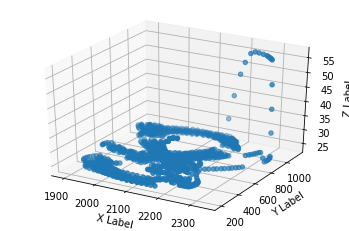

In [136]:
matX = np.genfromtxt('q3dm1-path2.csv',delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1], matX[:,0], matX[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

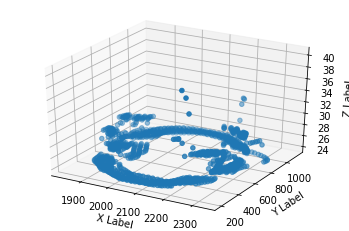

In [137]:
matX = np.genfromtxt('q3dm1-path1.csv',delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1], matX[:,0], matX[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

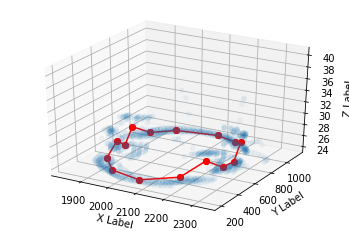

In [148]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1], matX[:,0], matX[:,2], marker='o', alpha=0.05)

for x in range(len(SOM.nodes()) - 1):
    ax.plot([SOM.nodes()[x]["w"][1], SOM.nodes()[x+1]["w"][1]],
            [SOM.nodes()[x]["w"][0], SOM.nodes()[x+1]["w"][0]],
            [SOM.nodes()[x]["w"][2], SOM.nodes()[x+1]["w"][2]],
            'ro-')

ax.plot([SOM.nodes()[0]["w"][1], SOM.nodes()[14]["w"][1]],
        [SOM.nodes()[0]["w"][0], SOM.nodes()[14]["w"][0]],
        [SOM.nodes()[0]["w"][2], SOM.nodes()[14]["w"][2]],
        'ro-')

# ax.scatter(SOM.nodes()[x]["w"][1], SOM.nodes()[x]["w"][0], SOM.nodes()[x]["w"][2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [139]:
list(SOM.nodes(data=True))

[(0, {'w': array([ 325.12673629, 2193.62225034,   24.90239046])}),
 (1, {'w': array([ 231.57386137, 2078.38994423,   24.15104352])}),
 (2, {'w': array([ 290.15434916, 1960.69654508,   24.15299666])}),
 (3, {'w': array([ 410.90839987, 1900.34481601,   24.62623503])}),
 (4, {'w': array([ 546.65951922, 1894.5241337 ,   26.405082  ])}),
 (5, {'w': array([ 671.73410131, 1880.1951815 ,   24.32898695])}),
 (6, {'w': array([ 790.64931592, 1870.55894013,   26.52287886])}),
 (7, {'w': array([ 934.021149  , 1890.06378874,   24.38270446])}),
 (8, {'w': array([1065.12132066, 1948.56612596,   24.14386013])}),
 (9, {'w': array([1110.49063224, 2090.19795885,   24.15765371])}),
 (10, {'w': array([1034.01339941, 2178.83048733,   24.43439016])}),
 (11, {'w': array([ 898.53871282, 2237.0400185 ,   26.20303154])}),
 (12, {'w': array([ 743.14133163, 2259.14844877,   24.37762538])}),
 (13, {'w': array([ 610.38530979, 2258.24311905,   24.62182099])}),
 (14, {'w': array([ 464.53729898, 2242.37490911,   26.9298